In [8]:
from utils import *

import numpy as np

In [2]:
FILE = 'S001R10.edf'

raw = get_raw(FILE)
annotations = get_annotations(FILE)
subjects_dir, subject, trans, src, bem = get_fsaverage()
fwd = get_fwd(raw.info, trans, src, bem)
cov = get_cov(raw)
stc = get_stc(raw, fwd, cov)

labels, label_names = get_labels(subjects_dir, subject)

In [ ]:
# T0: Rest (runs 1,2)
# T1: onset of motion (real or imagined)
    # left fist (runs 3,4,7,8,11,12)
    # both fists (runs 5,6,9,10,13,14)
# T1: onset of motion (real or imagined)
    # right fist (runs 3,4,7,8,11,12)
    # both feet (runs 5,6,9,10,13,14)

In [37]:
def get_window(raw, annotation):
    window = raw.copy().crop(tmin=annotation['onset'], tmax=annotation['onset']+annotation['duration'])
    
    return window

def get_window_dict(raw, annotations):
    window_dict = {}

    for description in np.unique(annotations.description):

        list_of_windows = []
        for annotation in annotations[annotations.description==description]:
            list_of_windows.append(get_window(raw, annotation))

        window_dict[description] = list_of_windows

    return window_dict

In [39]:
window_dict = get_window_dict(raw, annotations)
window_dict

{'T0': [<RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>,
  <RawEDF | S001R10.edf, 64 x 673 (4.2 s), ~430 kB, data loaded>],
 'T

In [142]:
stc_label = stc.in_label(labels[0])

In [147]:
np.sum(stc.in_label(labels[0]).data, axis=0).shape

(1600,)

In [148]:

plt.plot(np.sum(stc.in_label(labels[0]).data, axis=0))
plt.plot(np.sum(stc.in_label(labels[3]).data, axis=0))

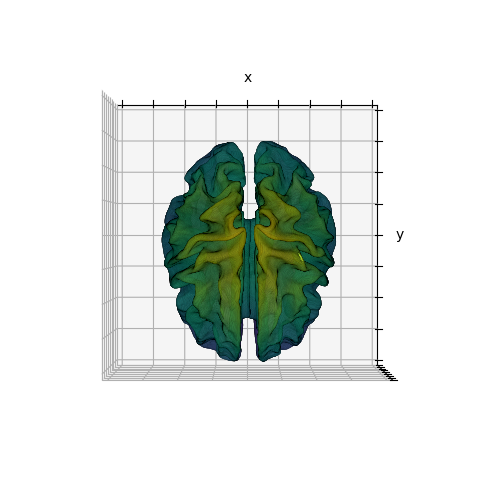

In [8]:
fig = plt.figure(figsize=(18,6))

#views = [(90,90), (0,0), (0,90)]
views = [(90,90)]

n_plots = len(views)

#for plot_idx in range(n_plots):

ax = fig.add_subplot(1, n_plots, 1, projection='3d')

ax.plot_trisurf(*fwd['src'][0]['rr'].T, triangles=triangles_lh, linewidth=0.1, shade=False, cmap='viridis', antialiased=True, edgecolor=(0,0,0,0.5))
ax.plot_trisurf(*fwd['src'][1]['rr'].T, triangles=triangles_rh, linewidth=0.1, shade=False, cmap='viridis', antialiased=True, edgecolor=(0,0,0,0.5))

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.set_xlim(-0.1, 0.1)
ax.set_ylim(-0.1, 0.1)
ax.set_zlim(-0.05, 0.15)
ax.set_box_aspect([1,1,1])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(90, 90)

#ax.dist = 8
ax.xaxis.labelpad = -2
ax.yaxis.labelpad = -5


In [46]:
NUMBER_LABELS_LH = 35
NUMBER_LABELS_RH = 34

In [96]:
stc.in_label(labels[8]).vertices

[array([ 149,  150,  337,  603,  604, 1343, 1346, 1372, 1759, 2444, 2445,
        2446, 2447, 2448, 2449, 2450, 2451, 3292, 3892, 5444, 5466, 5467,
        5468, 5469, 5470, 5471, 5472, 5473, 5474, 5478, 5479, 5480, 5481,
        5482, 5483, 5484, 6079, 7028, 7031, 7032, 7033, 7034, 7078, 7945,
        9888, 9889, 9891, 9892, 9893, 9894, 9895, 9896, 9897, 9898, 9899,
        9902, 9903, 9904, 9905, 9906, 9907, 9908, 9909, 9910, 9911, 9912,
        9913, 9914]),
 array([], dtype=int64)]

In [116]:
stc.vertices

[array([    0,     1,     2, ..., 10239, 10240, 10241]),
 array([    0,     1,     2, ..., 10239, 10240, 10241])]

In [119]:
labels[0].vertices

array([   129,    133,    289, ..., 157244, 157245, 157246])

In [114]:
for label in labels:
        if stc.in_label(label).vertices[0].shape[0] != 0 and stc.in_label(label).vertices[1].shape[0] != 0:
            print(label)

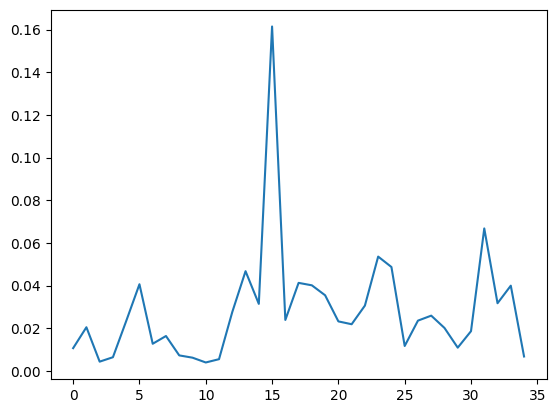

In [152]:
SAMPLE = 700

values_lh = np.empty(triangles_lh.shape[0])

label_activity = np.empty(NUMBER_LABELS_LH)

for label_idx in range(NUMBER_LABELS_LH):
    label_activity[label_idx] = np.sum(stc.in_label(labels[label_idx]).data, axis=0)[SAMPLE]

label_activity_normed = label_activity / np.sum(label_activity)

plt.plot(label_activity_normed)

In [21]:
colors_lh = np.empty(triangles_lh.shape[0])

for label_idx in range(number_labels_lh):
    colors_lh[labels[label_idx].vertices] = label_idx

In [25]:
labels[0].vertices

array([   129,    133,    289, ..., 157244, 157245, 157246])

In [26]:
colors_lh[0]

4.64738309744314e-310

In [ ]:
colors_lh = np.empty(triangles_lh.shape[0])
for i in range(triangles_lh.shape[0]):
    colors[i] = np.mean(values[mesh_data[i]])

In [ ]:
np.max(fwd['src'][0]['tris'] + 163841)

In [ ]:
np.max(fwd['src'][0]['tris'])

In [ ]:
vertex_locations.shape

In [ ]:
C.T.shape

In [32]:
src

'/home/williamtheodor/anaconda3/lib/python3.8/site-packages/nibabel/freesurfer/subjects/fsaverage/bem/fsaverage-ico-5-src.fif'

Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 64 channels.
    64 out of 64 channels remain after picking
Selected 64 channels
Creating the depth weighting matrix...
    64 EEG channels
    limit = 20485/20484 = 2.174517
    scale = 125525 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 1)
Computing rank from covariance with rank=None
    Using tolerance 3.2e-12 (2.2e-16 eps * 64 dim * 2.3e+02  max singular value)
    Estimated rank (eeg): 63
    EEG: rank 63 computed from 64 data channels with 1 projector
    Setting small EEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD

In [35]:
fwd['src']

<SourceSpaces: [<surface (lh), n_vertices=163842, n_used=10242>, <surface (rh), n_vertices=163842, n_used=10242>] head coords, subject 'fsaverage', ~25.6 MB>

-- number of adjacent vertices : 20484


In [44]:
labs.#

<Label | fsaverage, unnamed, lh : 163842 vertices>

In [21]:
d = stc.data
d.shape

(20484, 1600)

In [73]:
def plot_sources(source_locations, source_estimates, time_idx=0, views = [(90,90), (0,0)], save_fig=False):
    #views = [(90,90), (0,0), (0,90), (0, 180)]
    n_plots = len(views)

    fig = plt.figure(figsize=(12,8), dpi=200)

    for plot_idx in range(n_plots):
        ax = fig.add_subplot(1, n_plots, plot_idx+1, projection='3d')
        ax.scatter3D(source_locations[:,0], source_locations[:,1], source_locations[:,2], s=20, c=source_estimates[time_idx])

        ax.view_init(views[plot_idx][0], views[plot_idx][1])

        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])

    time = np.round(time_idx / 160, 3)
    fig.suptitle(f'Time: {time} s.', fontsize=16, y=.75)

    if save_fig:
        plt.savefig(f'Source Estimates/source_estimate{time_idx}', bbox_inches='tight', transparent=True)

    plt.tight_layout(pad=-10)
    plt.show()

In [28]:
from tqdm import trange

for i in trange(1000):
    i = 1

100%|██████████| 1000/1000 [00:00<00:00, 704333.17it/s]


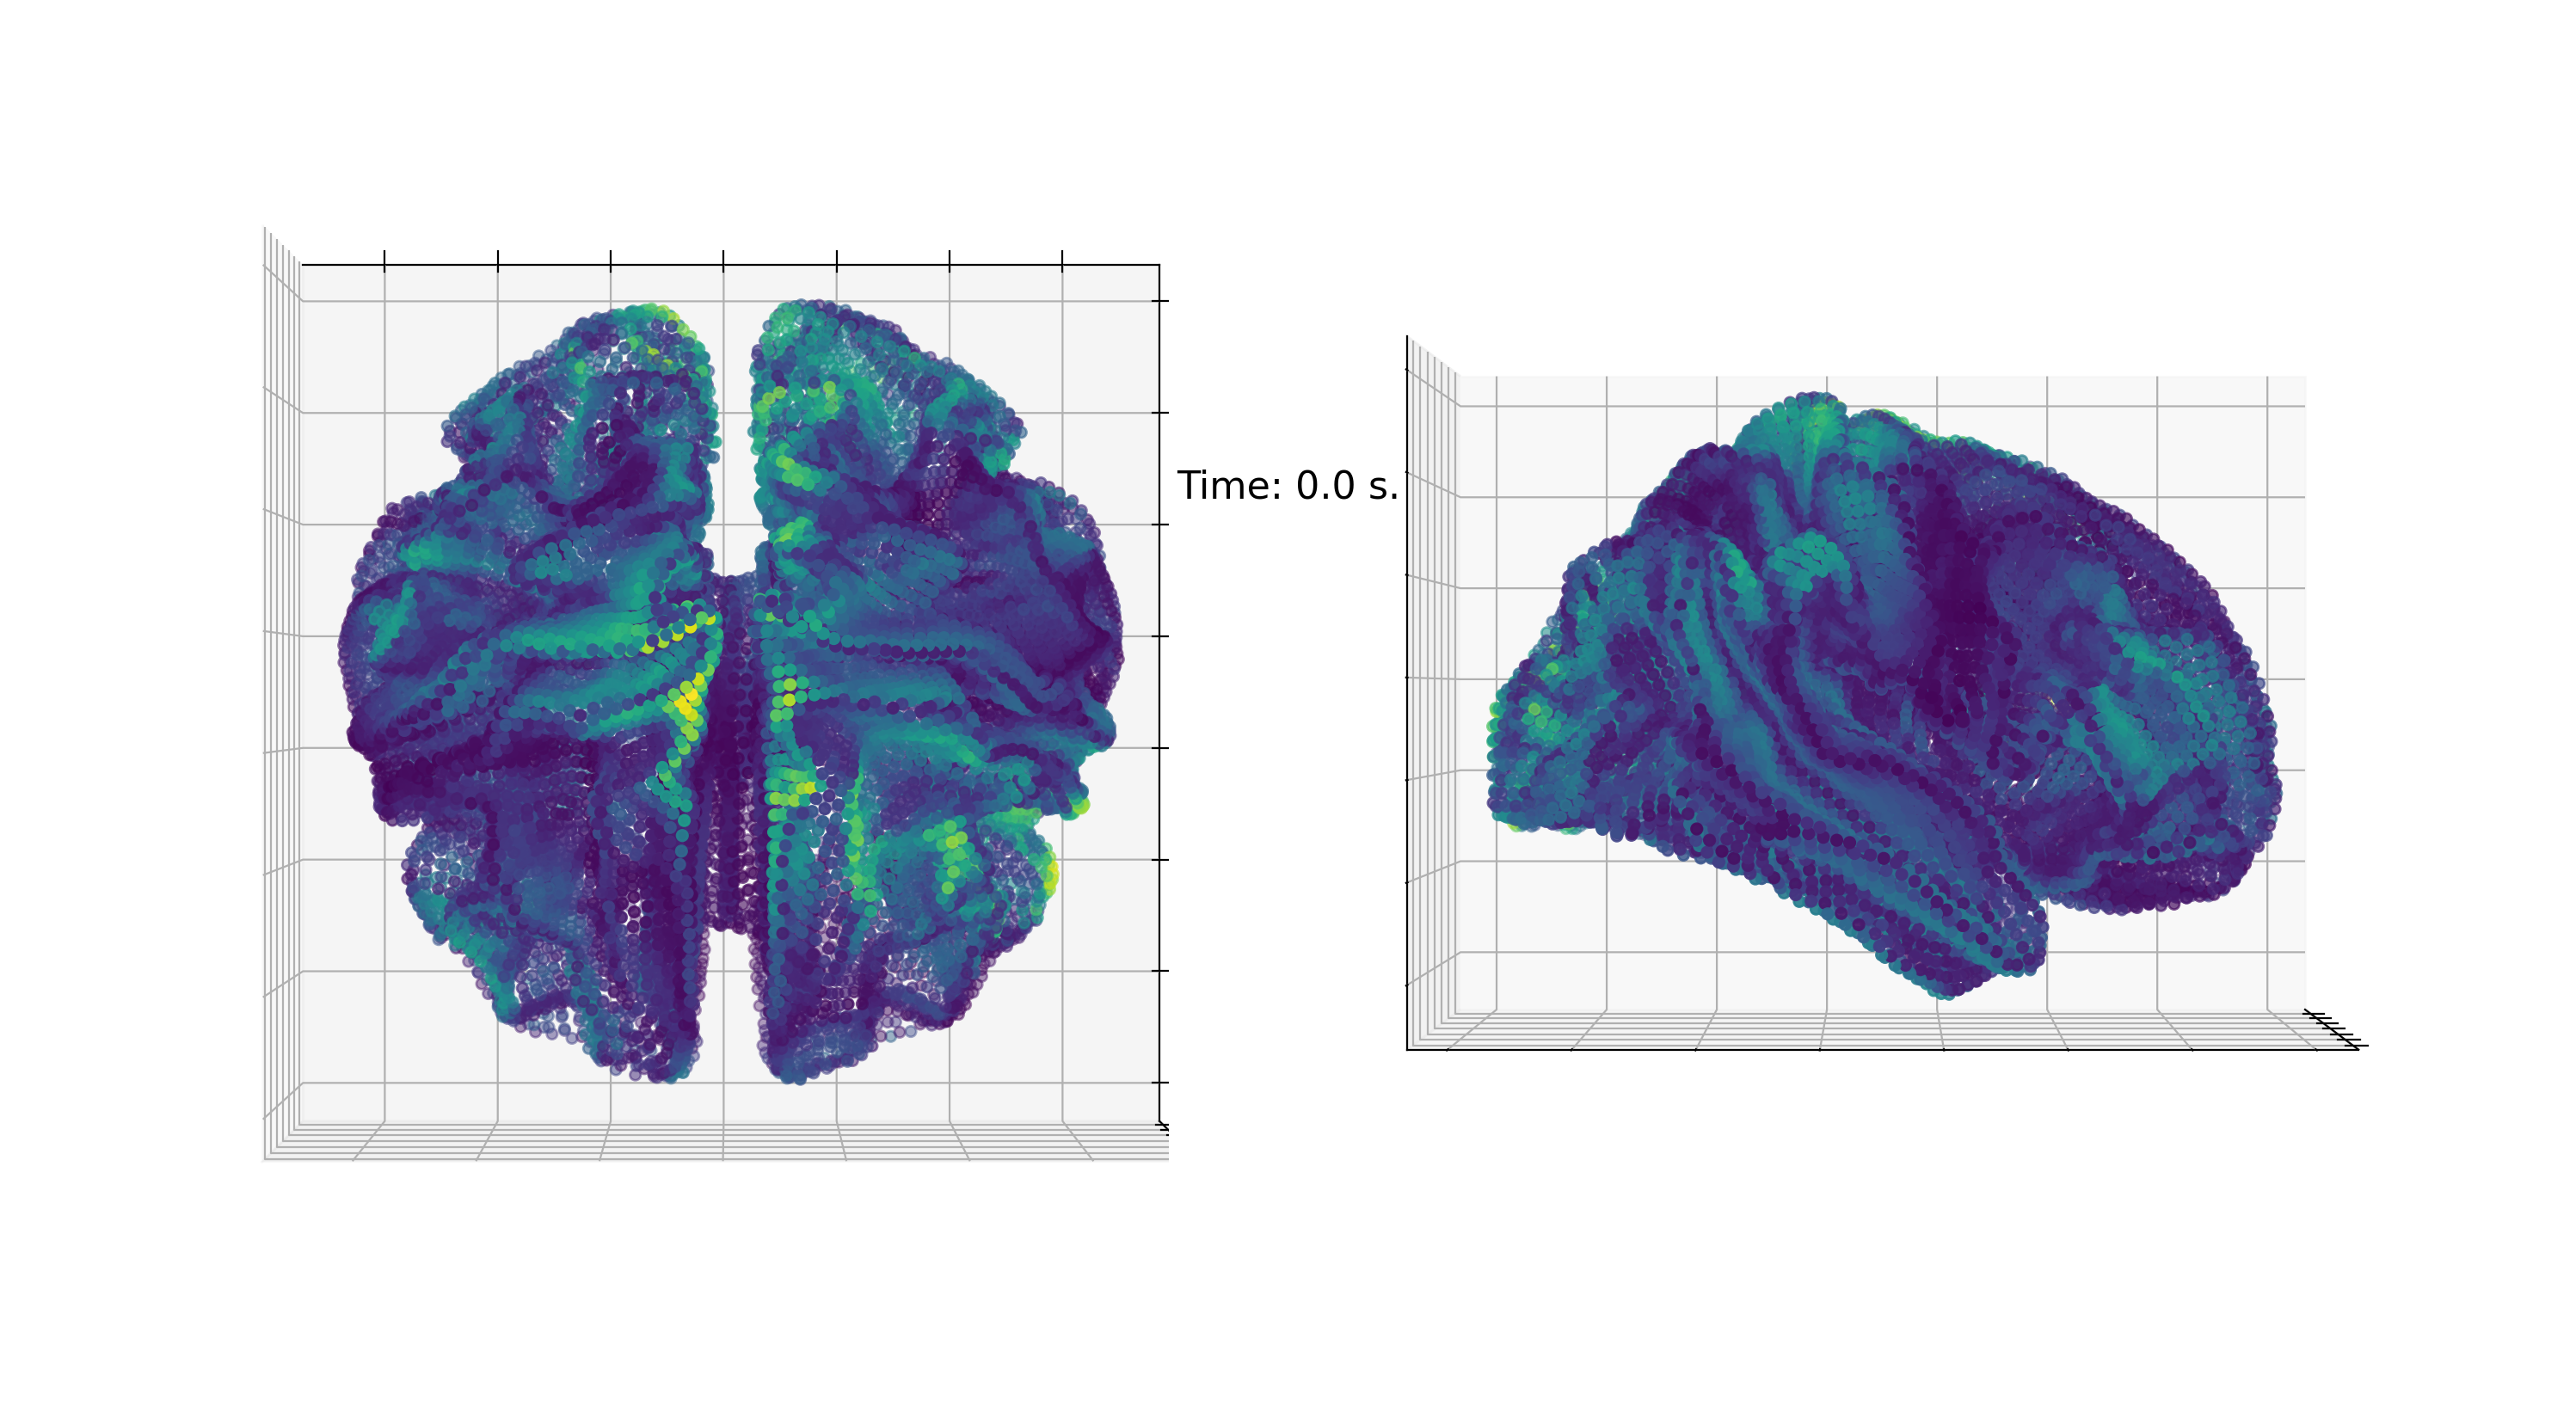

In [74]:
#for idx in trange(stc.data.shape[1]):
 #   plot_sources(source_locations, stc.data.T, time_idx=idx, views = [(90,90), (0,0)], save_fig=True)

plot_sources(source_locations, stc.data.T, time_idx=0, views = [(90,90), (0,0)], save_fig=True)


In [ ]:
fig = plt.figure(figsize=(12,8))

n_plots = 2
views = [(0,0), (0,90)]

colormap = [plt.get_cmap('tab20')(x) for x in np.linspace(0,1,20)]

for plot_idx in range(n_plots):
    
    ax = fig.add_subplot(1, n_plots, plot_idx+1, projection='3d')
    #ax.scatter3D(vertex_locations[:,0], vertex_locations[:,1], vertex_locations[:,2], s=.01)
    for idx, label in enumerate(labels): 
        region_locations = vertex_locations[label.get_vertices_used()]
        #ax.scatter3D(region_locations[:,0], region_locations[:,1], region_locations[:,2], s=.5, color=colormap[idx%20], label=label.name)
        ax.scatter3D(region_locations[:,0], region_locations[:,1], region_locations[:,2], s=50)#, color='blue', label=label.name)

    #ax.set_xlim(-.08, .07)
    #ax.set_ylim(-.1, -.1)
    #ax.set_zlim(-.01, -.1)

    ax.view_init(views[plot_idx][0], views[plot_idx][1])

plt.tight_layout()
plt.show()

In [ ]:
vertex_locations[labels[5].vertices].shape

In [ ]:
fig, ax = plt.subplots(1, 1)
im, _ = mne.viz.plot_topomap(L.T[9], raw.info, axes=ax, show=False)

In [ ]:
raw.compute_psd().plot_topomap();

In [ ]:
src = mne.setup_source_space(subject, spacing='oct6',
                             subjects_dir=subjects_dir, add_dist=False, verbose=False)

mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir,
                 brain_surfaces='white', src=src, orientation='coronal')

In [ ]:
mne.SourceEstimate(raw.get_data(), [0, 1], 0, 1)